In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing



In [3]:
df = pd.read_csv('Steel_industry_data.csv')

*Мощность 2 7 и 3 у трех категориальных признаков (WeekStatus, Day_of_week и Load_type), замаппим на числа*

In [4]:
df.max()

date                                    31/12/2018 23:45
Usage_kWh                                         157.18
Lagging_Current_Reactive.Power_kVarh               96.91
Leading_Current_Reactive_Power_kVarh               27.76
CO2(tCO2)                                           0.07
Lagging_Current_Power_Factor                       100.0
Leading_Current_Power_Factor                       100.0
NSM                                                85500
WeekStatus                                       Weekend
Day_of_week                                    Wednesday
Load_Type                                    Medium_Load
dtype: object

In [5]:
le = preprocessing.LabelEncoder()
for column_name in df.columns:
    if column_name == 'WeekStatus' or column_name == 'Day_of_week' or column_name == 'Load_Type':
        df[column_name] = le.fit_transform(df[column_name])

/Users/khumachbayramova/anaconda3/envs/recurrent-neural-network/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/khumachbayramova/anaconda3/envs/recurrent-neural-network/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/khumachbayramova/anaconda3/envs/recurrent-neural-network/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/khumachbayramova/anaconda3/envs/recurrent-neural-network/lib/python3.11/site-packages/sklearn/utils/va

In [6]:
X = df.iloc[:, [0, 2, 3, 4, 5, 6, 7, 8, 9, 10]]
y = df.iloc[:, 0:2]

# LSTM Implementation

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
X_train

,date,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
24510,13/09/2018 07:45,5.26,0.00,0.00,56.48,100.00,27900,0,4,0
11355,29/04/2018 07:00,3.74,0.00,0.00,57.52,100.00,25200,1,3,0
32539,05/12/2018 23:00,4.21,0.00,0.00,68.88,100.00,82800,0,6,1
18663,14/07/2018 10:00,1.66,0.29,0.02,99.91,100.00,36000,1,2,2
33094,11/12/2018 17:45,0.00,3.89,0.01,100.00,99.27,63900,0,5,1
...,...,...,...,...,...,...,...,...,...,...
16850,25/06/2018 12:45,0.00,25.27,0.00,100.00,22.22,45900,0,1,2
6265,07/03/2018 06:30,4.57,0.00,0.00,63.03,100.00,23400,0,6,0
11284,28/04/2018 13:15,0.14,14.33,0.01,99.99,68.76,47700,1,2,1
860,09/01/2018 23:15,4.32,0.00,0.00,73.19,100.00,83700,0,5,0


In [9]:
#Отсортируемся по времени
X_train = X_train.sort_values(by='date')
X_test = X_test.sort_values(by='date')
y_train = y_train.sort_values(by='date')
y_test = y_test.sort_values(by='date')
#Избавимся от времени
X_train = X_train.loc[:, X_train.columns != 'date']
X_test = X_test.loc[:, X_test.columns != 'date']
y_train = y_train.loc[:, y_train.columns != 'date']
y_test = y_test.loc[:, y_test.columns != 'date']

In [10]:
from sklearn.preprocessing import MinMaxScaler

# Создание объекта MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))

X_train = scaler.fit_transform(X_train)
y_train = scaler.fit_transform(y_train)
X_test = scaler.fit_transform(X_test)
y_test = scaler.fit_transform(y_test)


/Users/khumachbayramova/anaconda3/envs/recurrent-neural-network/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/khumachbayramova/anaconda3/envs/recurrent-neural-network/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/khumachbayramova/anaconda3/envs/recurrent-neural-network/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/khumachbayramova/anaconda3/envs/recurrent-neural-netw

In [23]:
rng = np.random.default_rng(51)


def tanh(x):
    return np.tanh(x)


def dtanh(x):
    return 1 - np.square(tanh(x))

def sig(x):
    return 1 / (1 + np.exp(-x))

def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

def mse(y_pred, y, batch_size):
     n = y_pred.shape[0]
     squared_batched = []
     for i in range(0, n , batch_size):
         batch_y_pred = y_pred[i:i + batch_size]
         batch_y = y[i:i + batch_size]
         squared_batched.append(0.5 * np.sum(np.square(batch_y_pred - batch_y)))
     err = np.mean(squared_batched)
     return err

def r2(y_pred, y, batch_size):
     n = y_pred.shape[0]
     chisl = 0
     znamen = np.sum((y - np.mean(y))**2) 
     for i in range(0, n , batch_size):
         batch_y_pred = y_pred[i:i + batch_size]
         batch_y = y[i:i + batch_size]
         chisl += np.sum((batch_y - batch_y_pred)**2) 
         
     return 1 - chisl/znamen


def dmse(y_pred, y):
    n = y.shape[0]
    return (2 / n) * (y_pred - y)

In [14]:
class LSTM:
    def __init__(self, features_count,  lstm_blocks_count, output_count, batch_size, learning_rate):
        
        self.batch_size = batch_size
        self.lstm_blocks_count = lstm_blocks_count
        self.features_count = features_count
        self.output_count = output_count
        self.lr = learning_rate
                
        Wf = self._gen_weights(features_count + lstm_blocks_count, lstm_blocks_count)
        bf = self._gen_bias(lstm_blocks_count)
        Wi = self._gen_weights(features_count + lstm_blocks_count, lstm_blocks_count)
        bi = self._gen_bias(lstm_blocks_count)
        Wc = self._gen_weights(features_count + lstm_blocks_count, lstm_blocks_count)
        bc = self._gen_bias(lstm_blocks_count)
        Wo = self._gen_weights(features_count + lstm_blocks_count, lstm_blocks_count)
        bo = self._gen_bias(lstm_blocks_count)
        Wy = self._gen_weights(lstm_blocks_count, output_count)
        by = self._gen_bias(output_count)
        
        self.parameters = {"Wf": Wf, "Wi": Wi, "Wo": Wo, "Wc": Wc, "Wy": Wy, "bf": bf, "bi": bi, "bo": bo, "bc": bc, "by": by}
    
        self.y_pred = np.array([])
    
        # functions
        self.activation_fn = tanh
        self.activation_dfn = dtanh
        self.loss_fn = mse


    def _gen_weights(self, in_neurons, out_neurons):
        return rng.random((out_neurons, in_neurons)) * 2 - 1

    def _gen_bias(self, count):
        return rng.random((count, 1)) * 2 - 1

    def _compute_loss(self, X, y):
        y_pred = np.array(self.predict(X))
        y = np.array(y)
        y = y.reshape(y.shape[0])
        return self.loss_fn(y_pred, y, self.batch_size)

    def _cell_forward(self,xt, a_prev, c_prev):
          # Retrieve parameters from "parameters"
        Wf = self.parameters["Wf"]
        bf = self.parameters["bf"]
        Wi = self.parameters["Wi"]
        bi = self.parameters["bi"]
        Wc = self.parameters["Wc"]
        bc = self.parameters["bc"]
        Wo = self.parameters["Wo"]
        bo = self.parameters["bo"]
        Wy = self.parameters["Wy"]
        by = self.parameters["by"]
        
        xt = xt.reshape(xt.shape[0], 1)
        # Retrieve dimensions from shapes of xt and Wy
        n_x = self.features_count
        n_y = self.output_count
        n_a = self.lstm_blocks_count
    
        # Concatenate a_prev and xt (≈3 lines)
        concat = np.zeros((n_a + n_x, 1))
        concat[: n_a] = a_prev
        concat[n_a :] = xt
        concat = concat.reshape(concat.shape[0], 1)
    
        # Compute values for ft, it, cct, c_next, ot, a_next using the formulas given figure (4)
        ft = sig(np.dot(Wf, concat) + bf)
        it = sig(np.dot(Wi, concat) + bi)
        cct = np.tanh(np.dot(Wc, concat) + bc)
        c_next = ft * c_prev + it * cct
        ot = sig(np.dot(Wo, concat) + bo)
        a_next = ot * np.tanh(c_next)
        
        # Compute prediction of the LSTM cell (≈1 line)
        yt_pred = self.activation_fn(np.dot(Wy, a_next) + by)

        # store values needed for backward propagation in cache
        cache = (a_next, c_next, a_prev, c_prev, ft, it, cct, ot, xt, self.parameters)
    
        return a_next, c_next, yt_pred, cache
    
    def _feedforward(self, batch_X):
        caches = []
        self.y_pred = np.array([])
        a0 = np.random.randn(self.lstm_blocks_count)
        a0 = a0.reshape(a0.shape[0], 1)
        # Retrieve dimensions from shapes of x and Wy (≈2 lines)
        #FIXME Проверить порядок измерений
        n_x = self.features_count
        T_x = self.batch_size
        n_y = self.output_count
        n_a = self.lstm_blocks_count
        
        # initialize "a", "c" and "y" with zeros (≈3 lines)
        a = np.zeros((T_x, n_a))
        c = np.zeros((T_x, n_a))
        y = np.zeros((T_x, n_y))
        
        # Initialize a_next and c_next (≈2 lines)
        a_next = a0
        c_next = np.zeros((a_next.shape))
        
        # loop over all time-steps
        for t in range(T_x):
            # Update next hidden state, next memory state, compute the prediction, get the cache (≈1 line)
            a_next, c_next, yt, cache = self._cell_forward(batch_X[t, :], a_next, c_next)
            # Save the value of the new "next" hidden state in a 
            a[t, :] = a_next.reshape(a_next.shape[0])
            # Save the value of the prediction in y 
            y[t, :] = yt.reshape(yt.shape[0])
            # Save the value of the next cell state 
            c[t, :]  = c_next.reshape(c_next.shape[0])
            # Append the cache into caches 
            caches.append(cache)
        # store values needed for backward propagation in cache
        self.caches = (caches, batch_X)
        self.y_pred = np.append(self.y_pred, y) 

    
    def _cell_backprop(self, da_next, dc_next, cache):
         # Retrieve information from "cache"
        (a_next, c_next, a_prev, c_prev, ft, it, cct, ot, xt, parameters) = cache
        
        # Retrieve dimensions from xt's and a_next's shape (≈2 lines)
        n_x = self.features_count
        n_a = self.lstm_blocks_count
         
        da_next =  da_next.reshape(da_next.shape[0], 1)
        dc_next =  dc_next.reshape(dc_next.shape[0], 1)
        
        # Compute gates related derivatives, you can find their values can be found by looking carefully at equations (7) to (10) 
        dot = da_next * np.tanh(c_next) * ot * (1 - ot)
        dcct = (da_next * ot * (1 - np.tanh(c_next) ** 2) + dc_next) * it * (1 - cct ** 2)
        dit = (da_next * ot * (1 - np.tanh(c_next) ** 2) + dc_next) * cct * (1 - it) * it
        dft = (da_next * ot * (1 - np.tanh(c_next) ** 2) + dc_next) * c_prev * ft * (1 - ft)
    
        # Compute parameters related derivatives. Use equations (11)-(14) 
        
        dWf = np.dot(dft, np.hstack([a_prev.T, xt.T]))
        dWi = np.dot(dit, np.hstack([a_prev.T, xt.T]))
        dWc = np.dot(dcct, np.hstack([a_prev.T, xt.T]))
        dWo = np.dot(dot, np.hstack([a_prev.T, xt.T]))
        dbf = np.sum(dft, axis=1, keepdims=True)
        dbi = np.sum(dit, axis=1, keepdims=True)
        dbc = np.sum(dcct, axis=1, keepdims=True)
        dbo = np.sum(dot, axis=1, keepdims=True)
    
    
        Wf = self.parameters["Wf"]
        Wi = self.parameters["Wi"]
        Wc = self.parameters["Wc"]
        Wo = self.parameters["Wo"]
    
        # Compute derivatives w.r.t previous hidden state, previous memory state and input. Use equations (15)-(17). (≈3 lines)    
        da_prev = np.dot(Wf[:, :n_a].T, dft) + np.dot(Wc[:, :n_a].T, dcct) + np.dot(Wi[:, :n_a].T, dit) + np.dot(Wo[:, :n_a].T, dot)
        dc_prev = (da_next * ot * (1 - np.tanh(c_next) ** 2) + dc_next) * ft
        dxt = np.dot(Wf[:, n_a:].T, dft) + np.dot(Wc[:, n_a:].T, dcct) + np.dot(Wi[:, n_a:].T, dit) + np.dot(Wo[:, n_a:].T, dot)
        ### END CODE HERE ###
        
        # Save gradients in dictionary
        gradients = {"dxt": dxt, "da_prev": da_prev, "dc_prev": dc_prev, "dWf": dWf,"dbf": dbf, "dWi": dWi,"dbi": dbi,
                    "dWc": dWc,"dbc": dbc, "dWo": dWo,"dbo": dbo}
    
        return gradients

    def _backprop(self):
        # Retrieve values from the first cache (t=1) of caches.
        (caches, x) = self.caches
        da = np.random.randn(self.lstm_blocks_count, self.batch_size)
        (a1, c1, a0, c0, f1, i1, cc1, o1, x1, parameters) = caches[0]
        
        # Retrieve dimensions from da's and x1's shapes (≈2 lines)
        T_x = self.batch_size
        n_a = self.lstm_blocks_count
        n_x = self.features_count
        
        # initialize the gradients with the right sizes (≈12 lines)
        dx = np.zeros((n_x, T_x))
        da0 = np.zeros((n_a))
        da_prevt = np.zeros((n_a))
        dc_prevt = np.zeros((n_a))
        dWf = np.zeros((n_a, n_a + n_x))
        dWi = np.zeros((n_a, n_a + n_x))
        dWc = np.zeros((n_a, n_a + n_x))
        dWo = np.zeros((n_a, n_a + n_x))
        dbf = np.zeros((n_a, 1))
        dbi = np.zeros((n_a, 1))
        dbc = np.zeros((n_a, 1))
        dbo = np.zeros((n_a, 1))
        
        # loop back over the whole sequence
        for t in reversed(range(T_x)):
            # Compute all gradients using lstm_cell_backward
            gradients = self._cell_backprop(da[:,t] + da_prevt, dc_prevt, caches[t])
            # Store or add the gradient to the parameters' previous step's gradient
            dx[:,t] = gradients["dxt"].reshape(gradients["dxt"].shape[0])
            dWf += gradients["dWf"]
            dWi += gradients["dWi"]
            dWc += gradients["dWc"]
            dWo += gradients["dWo"]
            dbf += gradients["dbf"]
            dbi += gradients["dbi"]
            dbc += gradients["dbc"]
            dbo += gradients["dbo"]
        # Set the first activation's gradient to the backpropagated gradient da_prev.
        da0 = gradients["da_prev"]
        
        # Store the gradients in a python dictionary
        self.gradients = {"dx": dx, "da0": da0, "dWf": dWf,"dbf": dbf, "dWi": dWi,"dbi": dbi,
                    "dWc": dWc,"dbc": dbc, "dWo": dWo,"dbo": dbo}
        
    def _update_params(self):
        Wf = self.parameters["Wf"] - self.lr * self.gradients["dWf"]
        bf = self.parameters["bf"] - self.lr * self.gradients["dbf"]
        Wi = self.parameters["Wi"] - self.lr * self.gradients["dWi"]
        bi = self.parameters["bi"] - self.lr * self.gradients["dbi"]
        Wc = self.parameters["Wc"] - self.lr * self.gradients["dWc"]
        bc = self.parameters["bc"] - self.lr * self.gradients["dbc"]
        Wo = self.parameters["Wo"] - self.lr * self.gradients["dWo"]
        bo = self.parameters["bo"] - self.lr * self.gradients["dbo"]
        
        Wy = self.parameters["Wy"]
        by = self.parameters["by"]
        self.parameters = {"Wf": Wf, "Wi": Wi, "Wo": Wo, "Wc": Wc, "Wy": Wy, "bf": bf, "bi": bi, "bo": bo, "bc": bc, "by": by}
        

    def train(self, X, y, max_epochs=1000, min_loss = 0.1):
        #даем на обучение по одному примерчику
        n = y.shape[0]
        epoch_losses = np.array([])
        y_pred = np.array([])
        y_true = np.array([])
        y_pred_first_batch = np.zeros((max_epochs, X.shape[0]//self.batch_size, self.batch_size))
        y_true_first_batch = np.zeros((max_epochs, X.shape[0]//self.batch_size, self.batch_size))
        batch_size = self.batch_size

        flag = 0

        for i in range(max_epochs):
            #даем на обучение по batch_size примерчиков
            count = 0
            for j in range(0, n , batch_size):
                batch_X = X.iloc[j:j + batch_size].values
                batch_Y = y.iloc[j:j + batch_size].values
                self._feedforward(batch_X)
                self._backprop()
                self._update_params()
            epoch_losses = np.append(epoch_losses, self._compute_loss(X, y))
            print(f"Epoch {i}, epoch loss = {epoch_losses[i]}")
            if epoch_losses[i] < min_loss:
                flag = 1
            if flag == 1:
                break
        return epoch_losses

    def predict(self, X):
        batch_size = self.batch_size
        n = X.shape[0]
        y_pred = []
        for k in range(0, n , batch_size):
            self._feedforward(X.iloc[k:k + batch_size].values)
            y_pred.extend(self.y_pred)
        return y_pred


Epoch 0, epoch loss = 0.7521324607885763
Epoch 1, epoch loss = 2.335551385179223
Epoch 2, epoch loss = 2.728037562641437
Epoch 3, epoch loss = 2.474276939676739
Epoch 4, epoch loss = 2.79255566771696
Epoch 5, epoch loss = 2.6357465746098137
Epoch 6, epoch loss = 2.4271650976356782
Epoch 7, epoch loss = 3.633034649267756
Epoch 8, epoch loss = 3.6563540591274077
Epoch 9, epoch loss = 3.664482355046394
Epoch 10, epoch loss = 3.9911683698811635
Epoch 11, epoch loss = 4.939378608037113
Epoch 12, epoch loss = 4.580937125550872
Epoch 13, epoch loss = 5.4883038175683865
Epoch 14, epoch loss = 5.652839528144724
Epoch 15, epoch loss = 5.28739914065212
Epoch 16, epoch loss = 5.436352672441389
Epoch 17, epoch loss = 5.525643898707516
Epoch 18, epoch loss = 5.660120653246255
Epoch 19, epoch loss = 5.705368957416933
Epoch 20, epoch loss = 5.702085149113143
Epoch 21, epoch loss = 5.962360534795608
Epoch 22, epoch loss = 5.837261357898531
Epoch 23, epoch loss = 6.043894380958678
Epoch 24, epoch loss =

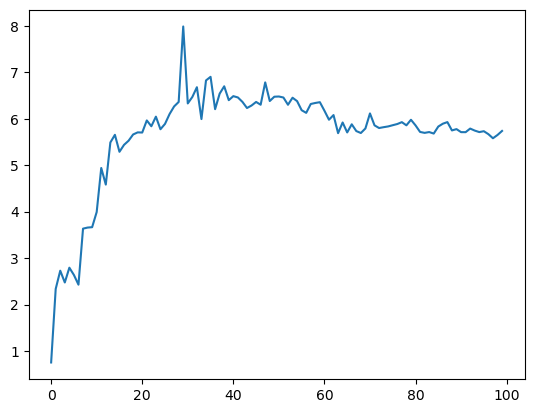

In [109]:
nn =  LSTM(9, 10, 1, 8, learning_rate=0.3)
epoch_losses = nn.train(pd.DataFrame(X_train), pd.DataFrame(y_train), min_loss= 0.2, max_epochs = 100)
plt.plot(epoch_losses)
print(f"First epoch loss - {epoch_losses[0]}\nLast epoch loss - {epoch_losses[-1]}")

Epoch 0, epoch loss = 11.247883998852384
Epoch 1, epoch loss = 9.739157531695586
Epoch 2, epoch loss = 7.822817508120558
Epoch 3, epoch loss = 9.375920565771187
Epoch 4, epoch loss = 10.058602882881415
Epoch 5, epoch loss = 9.539445519447758
Epoch 6, epoch loss = 8.909554235549985
Epoch 7, epoch loss = 8.234335797500476
Epoch 8, epoch loss = 7.977392068780927
Epoch 9, epoch loss = 8.183576366533455
Epoch 10, epoch loss = 9.30553667168411
Epoch 11, epoch loss = 10.820603919425782
Epoch 12, epoch loss = 9.818745627208072
Epoch 13, epoch loss = 5.821037523660787
Epoch 14, epoch loss = 5.89434790166872
Epoch 15, epoch loss = 6.622998596593155
Epoch 16, epoch loss = 7.443582149650925
Epoch 17, epoch loss = 8.970074985895975
Epoch 18, epoch loss = 9.300275951602265
Epoch 19, epoch loss = 9.329773959047891
Epoch 20, epoch loss = 9.67503835087391
Epoch 21, epoch loss = 9.69534200121586
Epoch 22, epoch loss = 6.611117812026333
Epoch 23, epoch loss = 9.281228870596998
Epoch 24, epoch loss = 8.66

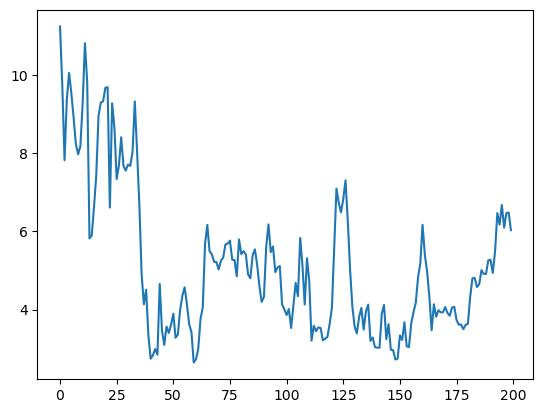

In [110]:
nn =  LSTM(9, 20, 1, 8, learning_rate=0.3)
epoch_losses = nn.train(pd.DataFrame(X_train), pd.DataFrame(y_train), min_loss= 0.2, max_epochs = 200)
plt.plot(epoch_losses)
print(f"First epoch loss - {epoch_losses[0]}\nLast epoch loss - {epoch_losses[-1]}")

Epoch 0, epoch loss = 9.980452393033794
Epoch 1, epoch loss = 6.869998415892032
Epoch 2, epoch loss = 11.240095673512256
Epoch 3, epoch loss = 10.162280474361028
Epoch 4, epoch loss = 6.925742884391858
Epoch 5, epoch loss = 3.8337315801343066
Epoch 6, epoch loss = 2.8867397662118117
Epoch 7, epoch loss = 2.701057954282753
Epoch 8, epoch loss = 2.1317627730025
Epoch 9, epoch loss = 3.569839879486495
Epoch 10, epoch loss = 3.9470035701282598
Epoch 11, epoch loss = 4.579005886735945
Epoch 12, epoch loss = 5.854372928523864
Epoch 13, epoch loss = 5.016630509007025
Epoch 14, epoch loss = 7.204676500844336
Epoch 15, epoch loss = 6.8128026903088585
Epoch 16, epoch loss = 8.226205261431485
Epoch 17, epoch loss = 9.45966827356747
Epoch 18, epoch loss = 8.471819576082975
Epoch 19, epoch loss = 7.530709033290257
Epoch 20, epoch loss = 5.715500109500584
Epoch 21, epoch loss = 8.380175507632933
Epoch 22, epoch loss = 6.395594341453302
Epoch 23, epoch loss = 7.448007252251522
Epoch 24, epoch loss = 

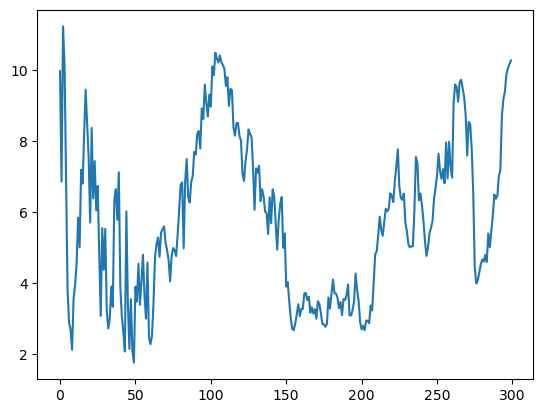

In [112]:
nn =  LSTM(9, 50, 1, 8, learning_rate=0.1)
epoch_losses = nn.train(pd.DataFrame(X_train), pd.DataFrame(y_train), min_loss= 0.2, max_epochs = 300)
plt.plot(epoch_losses)
print(f"First epoch loss - {epoch_losses[0]}\nLast epoch loss - {epoch_losses[-1]}")

Epoch 0, epoch loss = 8.667408102100758
Epoch 1, epoch loss = 8.69691205288096
Epoch 2, epoch loss = 8.256459618887062
Epoch 3, epoch loss = 8.160486674241964
Epoch 4, epoch loss = 4.603006061899285
Epoch 5, epoch loss = 3.8408179449859814
Epoch 6, epoch loss = 3.955538160781762
Epoch 7, epoch loss = 3.894102531168258
Epoch 8, epoch loss = 2.9922884933029894
Epoch 9, epoch loss = 2.576909484803332
Epoch 10, epoch loss = 2.4837934918494833
Epoch 11, epoch loss = 2.9459324645728344
Epoch 12, epoch loss = 2.2681095274269873
Epoch 13, epoch loss = 2.332802935343516
Epoch 14, epoch loss = 1.6871338468363755
Epoch 15, epoch loss = 2.2138639735862315
Epoch 16, epoch loss = 3.0847845720557987
Epoch 17, epoch loss = 2.5611287248600707
Epoch 18, epoch loss = 2.6281256703049163
Epoch 19, epoch loss = 2.202553693893027
Epoch 20, epoch loss = 2.7970253268505565
Epoch 21, epoch loss = 3.5206159082311372
Epoch 22, epoch loss = 3.4829067111885887
Epoch 23, epoch loss = 2.873366380354371
Epoch 24, epoc

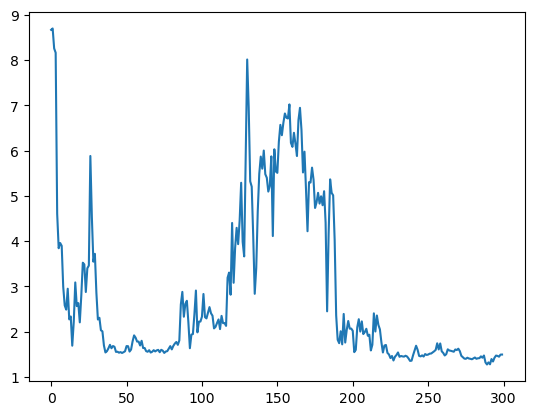

In [113]:
nn =  LSTM(9, 50, 1, 8, learning_rate=0.01)
epoch_losses = nn.train(pd.DataFrame(X_train), pd.DataFrame(y_train), min_loss= 0.2, max_epochs = 300)
plt.plot(epoch_losses)
print(f"First epoch loss - {epoch_losses[0]}\nLast epoch loss - {epoch_losses[-1]}")

Epoch 0, epoch loss = 1.118991995660323
Epoch 1, epoch loss = 6.2857181974264265
Epoch 2, epoch loss = 3.0220871554512763
Epoch 3, epoch loss = 1.1468953843734142
Epoch 4, epoch loss = 1.3376709409916023
Epoch 5, epoch loss = 2.4976820152901933
Epoch 6, epoch loss = 5.369861842561107
Epoch 7, epoch loss = 4.973427513718951
Epoch 8, epoch loss = 4.460389833764196
Epoch 9, epoch loss = 0.9457089764721622
Epoch 10, epoch loss = 3.099912437696873
Epoch 11, epoch loss = 3.829959050530396
Epoch 12, epoch loss = 4.945561503969332
Epoch 13, epoch loss = 4.610917253878259
Epoch 14, epoch loss = 4.241952606185356
Epoch 15, epoch loss = 2.650289835625259
Epoch 16, epoch loss = 4.489680332304728
Epoch 17, epoch loss = 3.70346373121015
Epoch 18, epoch loss = 5.885490659525465
Epoch 19, epoch loss = 4.963054011547244
Epoch 20, epoch loss = 2.351165470737164
Epoch 21, epoch loss = 1.623225804960747
Epoch 22, epoch loss = 1.3479107036262847
Epoch 23, epoch loss = 1.3109751759444466
Epoch 24, epoch los

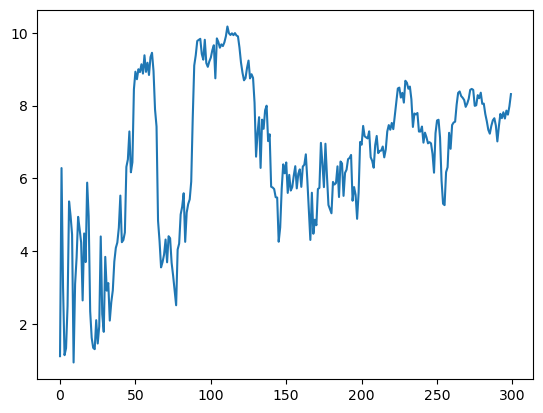

In [114]:
nn =  LSTM(9, 50, 1, 8, learning_rate=0.05)
epoch_losses = nn.train(pd.DataFrame(X_train), pd.DataFrame(y_train), min_loss= 0.2, max_epochs = 300)
plt.plot(epoch_losses)
print(f"First epoch loss - {epoch_losses[0]}\nLast epoch loss - {epoch_losses[-1]}")

In [115]:
nn =  LSTM(9, 150, 1, 8, learning_rate=0.05)
epoch_losses = nn.train(pd.DataFrame(X_train), pd.DataFrame(y_train), min_loss= 0.2, max_epochs = 300)
plt.plot(epoch_losses)
print(f"First epoch loss - {epoch_losses[0]}\nLast epoch loss - {epoch_losses[-1]}")

Epoch 0, epoch loss = 5.580977271024909
Epoch 1, epoch loss = 4.370219030890941
Epoch 2, epoch loss = 9.18331257559897
Epoch 3, epoch loss = 4.779454107903293
Epoch 4, epoch loss = 3.3686367960278076
Epoch 5, epoch loss = 3.359001406768716
Epoch 6, epoch loss = 3.8999271490660323
Epoch 7, epoch loss = 4.408220765276675
Epoch 8, epoch loss = 4.151626957145141
Epoch 9, epoch loss = 2.8527307923854788
Epoch 10, epoch loss = 9.65749162664951
Epoch 11, epoch loss = 5.954374752608112
Epoch 12, epoch loss = 9.141047352038624
Epoch 13, epoch loss = 8.414467908235942
Epoch 14, epoch loss = 2.3805614390232273
Epoch 15, epoch loss = 2.3039639787464505
Epoch 16, epoch loss = 2.2059123174001103
Epoch 17, epoch loss = 8.782216787058708
Epoch 18, epoch loss = 9.289553000238064
Epoch 19, epoch loss = 9.174178613601402
Epoch 20, epoch loss = 6.769556395977795
Epoch 21, epoch loss = 8.476437605802202
Epoch 22, epoch loss = 9.37593711842592
Epoch 23, epoch loss = 7.474065235518624
Epoch 24, epoch loss = 

KeyboardInterrupt: 

Epoch 0, epoch loss = 0.7627624587497207
Epoch 1, epoch loss = 1.0255015651863422
Epoch 2, epoch loss = 0.954348348861169
Epoch 3, epoch loss = 0.9751953736490568
Epoch 4, epoch loss = 0.841165672172982
Epoch 5, epoch loss = 0.9155423147248768
Epoch 6, epoch loss = 0.8283315320545578
Epoch 7, epoch loss = 0.8395964789764764
Epoch 8, epoch loss = 1.6273399990784947
Epoch 9, epoch loss = 1.7217015246078127
Epoch 10, epoch loss = 1.7269535232240258
Epoch 11, epoch loss = 1.9063762434972842
Epoch 12, epoch loss = 2.5895110266241748
Epoch 13, epoch loss = 2.557843750689663
Epoch 14, epoch loss = 2.711826885942823
Epoch 15, epoch loss = 1.7222479530847687
Epoch 16, epoch loss = 1.9623785045289464
Epoch 17, epoch loss = 2.4588329222415726
Epoch 18, epoch loss = 2.616411658733103
Epoch 19, epoch loss = 2.645632304253166
Epoch 20, epoch loss = 2.6005807146281255
Epoch 21, epoch loss = 2.6701884169393093
Epoch 22, epoch loss = 3.1865677505573937
Epoch 23, epoch loss = 3.0863527481577226
Epoch 24

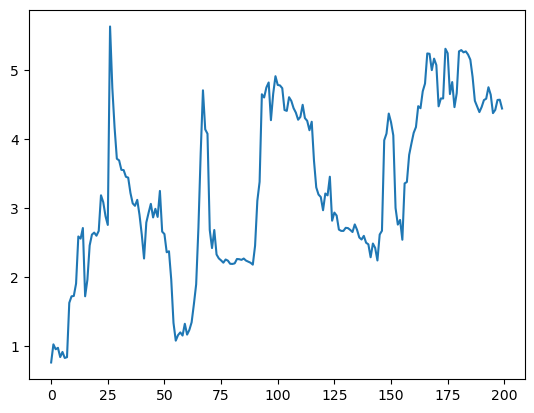

In [15]:
nn =  LSTM(9, 10, 1, 8, learning_rate=0.11)
epoch_losses = nn.train(pd.DataFrame(X_train), pd.DataFrame(y_train), min_loss= 0.2, max_epochs = 200)
plt.plot(epoch_losses)
print(f"First epoch loss - {epoch_losses[0]}\nLast epoch loss - {epoch_losses[-1]}")

Epoch 0, epoch loss = 1.7373966626035262
Epoch 1, epoch loss = 0.9721653954041697
Epoch 2, epoch loss = 7.914197745686701
Epoch 3, epoch loss = 2.6571959856017386
Epoch 4, epoch loss = 6.722317357710957
Epoch 5, epoch loss = 1.734660886219468
Epoch 6, epoch loss = 2.5646957779583457
Epoch 7, epoch loss = 4.094157037506883
Epoch 8, epoch loss = 2.7271583145448615
Epoch 9, epoch loss = 3.205391685674063
Epoch 10, epoch loss = 1.3707925203913096
Epoch 11, epoch loss = 1.2910968992948806
Epoch 12, epoch loss = 1.1738853722575107
Epoch 13, epoch loss = 0.9194268617127068
Epoch 14, epoch loss = 1.1008986404215444
Epoch 15, epoch loss = 1.632982830005772
Epoch 16, epoch loss = 1.269199337177295
Epoch 17, epoch loss = 1.4363520938284724
Epoch 18, epoch loss = 1.6484245569254845
Epoch 19, epoch loss = 1.2639382129183787
Epoch 20, epoch loss = 1.1718251105673452
Epoch 21, epoch loss = 1.4713909534496057
Epoch 22, epoch loss = 1.4243766993829214
Epoch 23, epoch loss = 1.2421619803309398
Epoch 24,

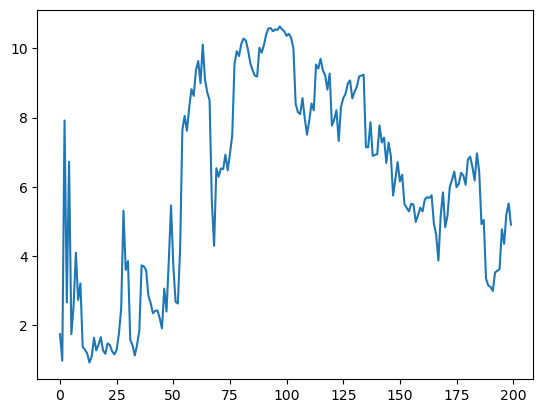

In [16]:
nn =  LSTM(9, 30, 1, 8, learning_rate=0.11)
epoch_losses = nn.train(pd.DataFrame(X_train), pd.DataFrame(y_train), min_loss= 0.2, max_epochs = 200)
plt.plot(epoch_losses)
print(f"First epoch loss - {epoch_losses[0]}\nLast epoch loss - {epoch_losses[-1]}")

Epoch 0, epoch loss = 2.106775437615358
Epoch 1, epoch loss = 7.4588182740869655
Epoch 2, epoch loss = 1.9200134117734635
Epoch 3, epoch loss = 1.7348499421472006
Epoch 4, epoch loss = 1.553178555244009
Epoch 5, epoch loss = 2.6103422119582813
Epoch 6, epoch loss = 1.6590506654328423
Epoch 7, epoch loss = 1.6916381108704157
Epoch 8, epoch loss = 1.7919901040676043
Epoch 9, epoch loss = 2.3328889899979286
Epoch 10, epoch loss = 1.8820701862847433
Epoch 11, epoch loss = 1.7775192202114842
Epoch 12, epoch loss = 1.6462157880920578
Epoch 13, epoch loss = 1.459608408993616
Epoch 14, epoch loss = 1.442148427015072
Epoch 15, epoch loss = 1.4566419303533737
Epoch 16, epoch loss = 1.5093720714409276
Epoch 17, epoch loss = 1.439043749602983
Epoch 18, epoch loss = 1.4669089322035636
Epoch 19, epoch loss = 1.441150323928881
Epoch 20, epoch loss = 1.959027353671964
Epoch 21, epoch loss = 1.8409738006047247
Epoch 22, epoch loss = 1.4713961088247354
Epoch 23, epoch loss = 1.9258358001060145
Epoch 24,

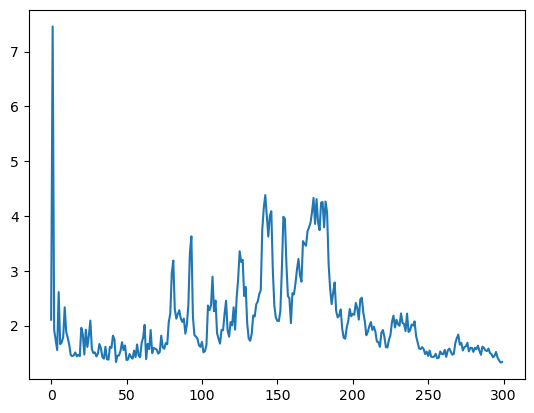

In [20]:
nn =  LSTM(9, 50, 1, 8, learning_rate=0.08)
epoch_losses = nn.train(pd.DataFrame(X_train), pd.DataFrame(y_train), min_loss=0.7, max_epochs = 300)
plt.plot(epoch_losses)
print(f"First epoch loss - {epoch_losses[0]}\nLast epoch loss - {epoch_losses[-1]}")

In [25]:
n = len(y_test)

observations = np.array(pd.DataFrame(y_test))  # фактические наблюдения
predictions = np.array(nn.predict(pd.DataFrame(X_test))) # предсказания (результат применения модели)

observations = observations.reshape(observations.shape[0])
mse_result = mse(predictions, observations, batch_size=4)
rmse_result = np.sqrt(mse_result)
r2_result = r2(predictions, observations, batch_size=4)
print(f'MSE: {mse_result}')
print(f'RMSE: {rmse_result}')
print(f'R^2: {r2_result}')



MSE: 0.7054548082786347
RMSE: 0.8399135719100119
R^2: 0.7840494966001543
